# **Import Library**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# **Import Data**

In [5]:
!git clone -l -s git://github.com/WillymanSP/prak-teksim.git

fatal: destination path 'prak-teksim' already exists and is not an empty directory.


In [6]:
#attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
#df = pd.read_csv('diabetes.csv', names=attributes)

In [7]:
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
n = 20 # every 20th line = 1% of the lines
df = pd.read_csv('/content/prak-teksim/tugas-akhir/dataset/diabetes.csv', names=attributes, header=0, skiprows=lambda i: i % n !=0)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,126,88,41,235,39.3,0.704,27,tidak diabetes
1,3,180,64,25,70,34.0,0.271,26,tidak diabetes
2,2,84,0,0,0,0.0,0.304,21,tidak diabetes
3,3,113,44,13,0,22.4,0.140,22,tidak diabetes
4,1,163,72,0,0,39.0,1.222,33,diabetes


In [9]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
33,2,56,56,28,45,24.2,0.332,22,tidak diabetes
34,2,122,76,27,200,35.9,0.483,26,tidak diabetes
35,4,83,86,19,0,29.3,0.317,34,tidak diabetes
36,11,120,80,37,150,42.3,0.785,48,diabetes
37,2,88,58,26,16,28.4,0.766,22,tidak diabetes


# **Pre Processing**

In [10]:
# memisahkan data uji dan latih
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [11]:
# Menskalakan Data menggunakan Transformasi Z-score
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Modeling**

In [12]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

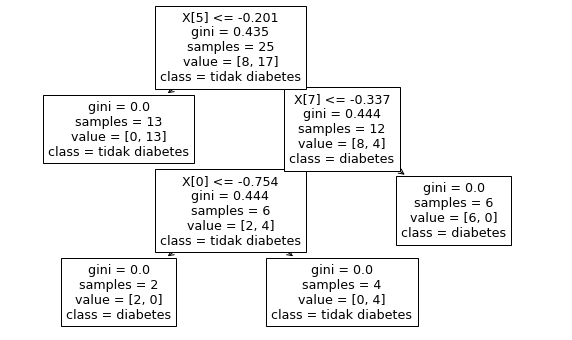

In [13]:
plt.figure(figsize=(10, 6))
cn = ['diabetes', 'tidak diabetes']
plot_tree(classifier, class_names = cn)
plt.show()

# **Evaluation**

In [14]:
# prediction
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      diabetes       0.80      0.80      0.80         5
tidak diabetes       0.88      0.88      0.88         8

      accuracy                           0.85        13
     macro avg       0.84      0.84      0.84        13
  weighted avg       0.85      0.85      0.85        13



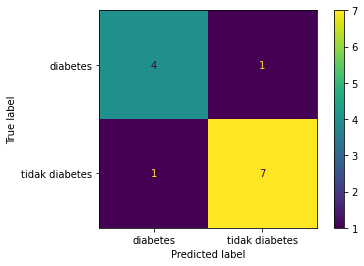

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()

# **Prediction**

In [16]:
# ambil input

Pregnancies = 11#@param {type:"number"}
Glucose =  143#@param {type:"number"}
BloodPressure = 94#@param {type:"number"}
SkinThickness =  33#@param {type:"number"}
Insulin = 146#@param {type:"number"}
BMI = 36.6#@param {type:"number"}
DiabetesPedigreeFunction = 0.254#@param {type:"number"}
Age = 51#@param {type:"number"}

# buat vektor untuk uji
x_coba = [[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]]
x_coba = scaler.transform(x_coba)

# prediksikan dengan model
y_pred = classifier.predict(x_coba)

# cetak hasil
print("Hasil prediksi: %s" % y_pred[0])

Hasil prediksi: diabetes


# **Cross Validation**

In [17]:
cv = cross_validate(DecisionTreeClassifier(), X, y, cv=5)
cv_pd = pd.DataFrame(cv)
cv_pd

,fit_time,score_time,test_score
0,0.000944,0.000516,0.875000
1,0.000741,0.000554,0.875000
2,0.000798,0.000472,0.875000
3,0.000789,0.000312,0.857143
4,0.000462,0.000253,0.714286


In [18]:
cv_pd.mean()

fit_time      0.000747
score_time    0.000421
test_score    0.839286
dtype: float64